## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape[0])
print(df.shape[1])

545
13


In [10]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [28]:
#4 Check for missing  values if any, replace with appropriate values
df.fillna(df.mean())

/tmp/ipykernel_5680/34115092.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df[['area','bedrooms','bathrooms','parking']]
y=df['price']


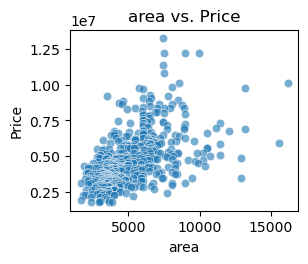

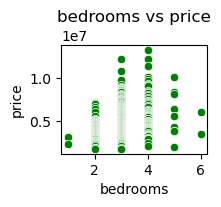

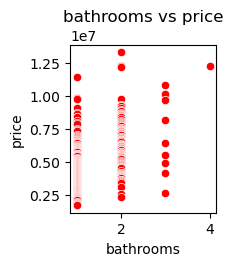

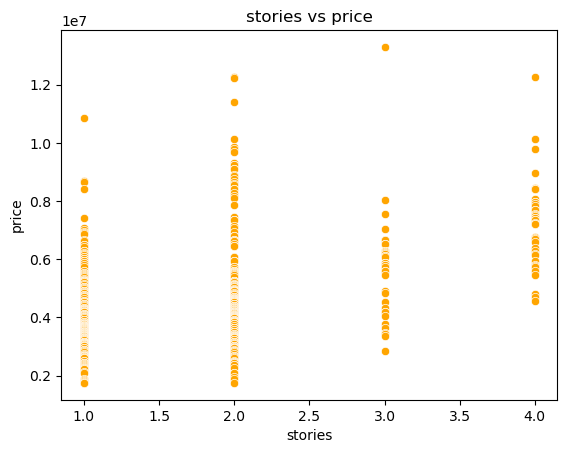

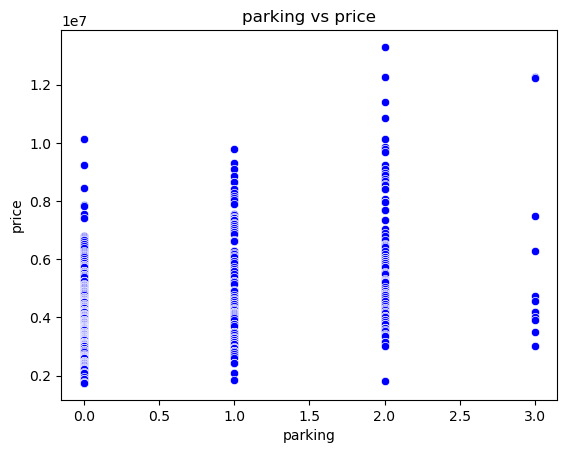

In [49]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.subplot(3,3,1)
sns.scatterplot(x=df['area'], y=df['price'], alpha=0.6)
plt.xlabel('area')
plt.ylabel('Price')
plt.title('area vs. Price')

plt.show()

plt.subplot(3,3,2)
sns.scatterplot(x=df['bedrooms'],y=df['price'],color='green')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('bedrooms vs price')

plt.show()

plt.subplot(2,3,3)
sns.scatterplot(x=df['bathrooms'],y=df['price'],color='red')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.title('bathrooms vs price')

plt.show()

sns.scatterplot(x=df['stories'],y=df['price'],color='orange')
plt.xlabel('stories')
plt.ylabel('price')
plt.title('stories vs price')

plt.show()

sns.scatterplot(x=df['parking'],y=df['price'],color='blue')
plt.xlabel('parking')
plt.ylabel('price')
plt.title('parking vs price')

plt.show()

In [8]:
#7 Encoding categorical data in X
pd.get_dummies(x,drop_first=True)

,area,bedrooms,bathrooms,parking
0,7420,4,2,2
1,8960,4,4,3
2,9960,3,2,2
3,7500,4,2,3
4,7420,4,1,2
...,...,...,...,...
540,3000,2,1,2
541,2400,3,1,0
542,3620,2,1,0
543,2910,3,1,0


In [3]:
#8  Avoiding the Dummy Variable Trap
categorical_columns = ['furnishingstatus']  # Example categorical column

# One-Hot Encoding while avoiding the Dummy Variable Trap
X = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows
X.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0,0


In [4]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose either Standardization or Normalization
scaler = StandardScaler()  # Use MinMaxScaler() for Normalization

# Apply scaling on numerical variables
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Display scaled features
X.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,yes,no,no,no,yes,1.517692,yes,0,0
1,12250000,1.757010,1.403419,5.405809,2.532024,yes,no,no,no,yes,2.679409,no,0,0
2,12250000,2.218232,0.047278,1.421812,0.224410,yes,no,yes,no,no,1.517692,yes,1,0
3,12215000,1.083624,1.403419,1.421812,0.224410,yes,no,yes,no,yes,2.679409,yes,0,0
4,11410000,1.046726,1.403419,-0.570187,0.224410,yes,yes,yes,no,yes,1.517692,no,0,0


In [12]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Splitting the dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the datasets
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)


X_train Shape: (381, 14)
X_test Shape: (164, 14)
y_train Shape: (381,)
y_test Shape: (164,)


In [14]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


ValueError: could not convert string to float: 'yes'

In [10]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate the error
train_error = y_train_pred - y_train

# Display the first few errors
print("First 5 Training Errors:")
print(train_error[:5])


ValueError: could not convert string to float: 'yes'

In [11]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_train_pred - y_train

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


NameError: name 'y_train_pred' is not defined

In [15]:
#14  Predic on the test set
# Predict on the test set
y_test_pred = model.predict(X_test)

# Display the first 5 predicted values
print("First 5 Predictions on Test Set:")
print(y_test_pred[:5])


ValueError: could not convert string to float: 'no'

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)